In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

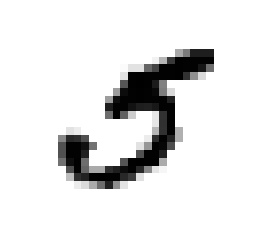

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[36000]

5.0

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

一些学习算法对训练样例的顺序敏感，当它们在一行中得到许多相似的样例，这些算法将会表现得非常的差

In [8]:
import numpy as np 

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier

随机梯度下降分类器，有一个好处，是能够高效地处理非常大的数据集。
这部分原因在于SGD一次只处理一条数据，这也使得SGD适合在线学习。

In [11]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([False])

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import warnings

In [14]:
skflods = StratifiedKFold(n_splits=3, random_state=42)
warnings.filterwarnings("ignore", message=".*FutureWarning.*")

In [15]:
sgd_clf = SGDClassifier(random_state=42)
for train_index, test_index in skflods.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9611


C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9642


C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9595


In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(sgd_clf,X_train, y_train_5, cv=3, scoring="accuracy")

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stoc

array([0.9611, 0.9642, 0.9595])

In [18]:
from sklearn.base import BaseEstimator

In [19]:
class Never5Classifier(BaseEstimator):
    def fit(self, X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)


这证明了为什么精度通常来说不是一个好的性能指标，特别是你处理有偏差的数据集，
比方说其中一些类比其他类频繁得多。

In [20]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9081 , 0.91095, 0.9099 ])

In [21]:
from sklearn.model_selection import cross_val_predict

In [22]:
y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_5, cv=3)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stoc

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_train_5, y_train_pred)

array([[53483,  1096],
       [ 1208,  4213]], dtype=int64)

In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_train_5, y_train_pred)

0.7935581088717273

In [27]:
recall_score(y_train_5, y_train_pred)

0.7771628850765542

F1支持那些有着相近准确率和召回率的分类器

In [28]:
from sklearn.metrics import f1_score

In [29]:
f1_score(y_train_5, y_train_pred)

0.7852749301025164

不幸的是，不能同时拥有两者。增加准确率会降低召回率，反之亦然。

In [30]:
sgd_clf.fit(X_train, y_train_5)
y_scores = sgd_clf.decision_function([some_digit])
y_scores

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([-67804.49199586])

In [31]:
threshold = 0

In [32]:
y_some_digit_pred = (y_scores > threshold)

In [33]:
y_some_digit_pred

array([False])

In [34]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [35]:
sgd_clf = SGDClassifier(random_state=42)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stoc

In [36]:
y_scores.shape

(60000,)

In [37]:
from sklearn.metrics import precision_recall_curve

In [38]:
precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

In [39]:
print(precision.shape)
print(recall.shape)
print(threshold.shape)

(59772,)
(59772,)
(59771,)


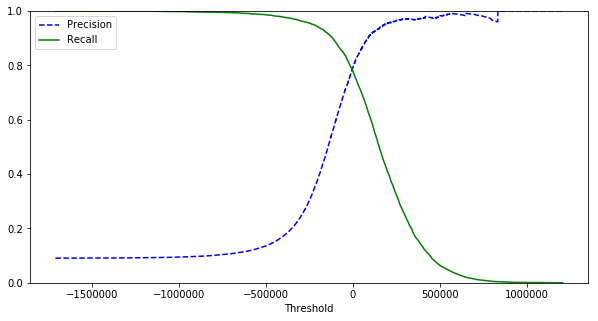

In [40]:
def plot_precision_recall_vs_threshold(presicion, recall, threshold):
    plt.figure(figsize=(10,5))
    plt.plot(threshold, precision[:-1], "b--", label="Precision")
    plt.plot(threshold, recall[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.show()

[0, 1, 0, 1]

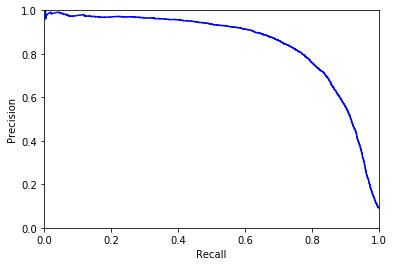

In [41]:
plt.plot(recall, precision, "b")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])

In [42]:
y_train_pred_90 = (y_scores > 70000)

In [43]:
precision_score(y_train_5, y_train_pred_90)

0.8850036936715094

In [44]:
recall_score(y_train_5, y_train_pred_90)

0.6629773104593248

In [45]:
from sklearn.metrics import roc_curve

In [46]:
fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

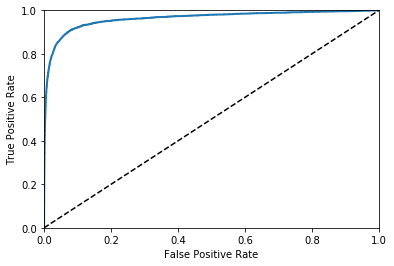

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0, 1, 0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
plot_roc_curve(fpr, tpr)
plt.show()

RCO曲线和PR曲线：优先使用PR曲线当正例很少或者当你关注假正例多于假反例

In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
roc_auc_score(y_train_5, y_scores)

0.9624394755449588

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
forest_clf = RandomForestClassifier(random_state=42)
y_probs_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [52]:
y_scores_forest  = y_probs_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

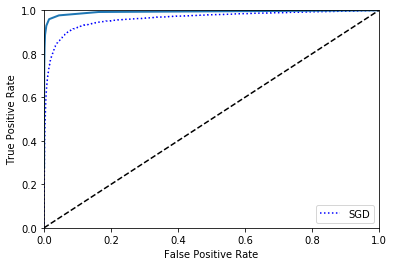

In [53]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest,tpr_forest)
plt.legend(loc="lower right")
plt.show()

In [54]:
plt.matshow?

In [56]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [57]:
sgd_clf.predict([some_digit])

array([5.])

In [58]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [59]:
some_digit_score = sgd_clf.decision_function([some_digit])

In [60]:
np.argmax(some_digit_score)

5

In [61]:
from sklearn.multiclass import OneVsOneClassifier
import warnings

warnings.filterwarnings('ignore')

In [62]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [63]:
ovo_clf.predict([some_digit])

array([5.])

In [64]:
len(ovo_clf.estimators_)

45

In [65]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [66]:
forest_clf.predict([some_digit])

array([5.])

In [67]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [68]:
cross_val_score(sgd_clf, X_train, y_train, scoring="accuracy", cv=3)

array([0.87722456, 0.87554378, 0.86352953])

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [71]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91066787, 0.9079454 , 0.91128669])

In [72]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=2)

In [73]:
y_train_pred.shape

(60000,)

In [74]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [75]:
conf_mx

array([[5638,    1,   38,   27,   12,   36,   21,   12,  128,   10],
       [   1, 6384,   55,   19,    8,   23,    3,   12,  213,   24],
       [  28,   47, 5196,  149,   61,   40,   30,   90,  286,   31],
       [  15,   23,  173, 5361,    9,  167,    9,   79,  193,  102],
       [  19,   27,   54,   21, 4916,   17,   27,   74,  230,  457],
       [  73,   44,   49,  480,   98, 3749,   56,   35,  705,  132],
       [  69,   43,  126,   29,   62,  183, 5131,   23,  232,   20],
       [  22,   16,   84,   26,   48,   10,    3, 5664,   79,  313],
       [  41,  143,  103,  205,   31,  201,   16,   59, 4936,  116],
       [  30,   25,   24,   93,  159,   40,    1,  280,  263, 5034]],
      dtype=int64)

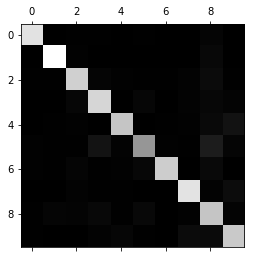

In [76]:

plt.matshow(conf_mx, cmap=plt.cm.gray )


In [77]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [78]:
norm_conf_mx = conf_mx / row_sums

In [79]:
np.fill_diagonal(norm_conf_mx,0)

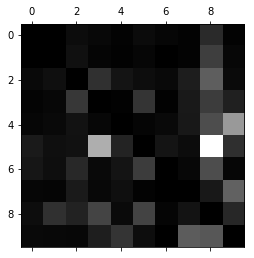

In [80]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
y_train_large = (y_train > 7)
y_train_odd = (y_train  % 2 == 1)

In [83]:
y_multiabel = np.c_[y_train_large, y_train_odd]

In [84]:
knn_clf = KNeighborsClassifier()

In [85]:
knn_clf.fit(X_train, y_multiabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [86]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [94]:
noise = np.random.randint(0, 100, (len(X_train), 784))
noise_test = np.random.randint(0, 100, (len(X_test), 784))

In [95]:
X_train_mod = X_train + noise
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

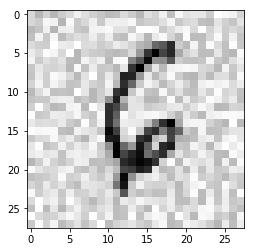

In [102]:
plt.imshow(X_train_mod[36000].reshape(28, 28), cmap=plt.cm.binary, interpolation="nearest")


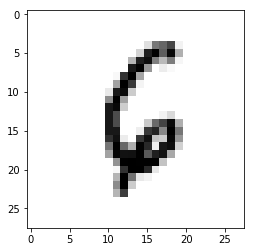

In [103]:
plt.imshow(X_train[36000].reshape(28, 28), cmap=plt.cm.binary, interpolation="nearest")

In [104]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [105]:
clean_digit = knn_clf.predict([X_test_mod[5500]])

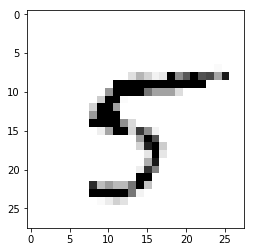

In [107]:
plt.imshow(clean_digit.reshape(28, 28), cmap=plt.cm.binary, interpolation="nearest")

In [108]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [{"weights":["uniform", "distance"]},{"n_neighbors":[3,4,5]}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid=param_grid,n_jobs=-1, verbose=5,)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [17]:
import os
import pandas as pd

In [18]:
TITANIC_PATH = r"E:\jupyter-workspace\datas\titanic"

In [19]:
def load_titanic_data(filename, titanic_path = TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [20]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin


class DataFrameSelector(BaseEstimator, TransformerMixin):

    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.attribute_names]


In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [115]:
imputer = Imputer(strategy="median")
num_attris = ["Age","SibSp","Parch","Fare"]
num_pipeline = Pipeline([("select_numeric", DataFrameSelector(num_attris)),
                        ("imputer", imputer)])

In [32]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [38]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X], index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [123]:
from sklearn.preprocessing import LabelBinarizer
class MyLabelBinarizer(BaseEstimator, TransformerMixin):

    def __init__(self, attribute_names) -> None:
        self.attribute_names = attribute_names
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        self.feature_names = []
        X = X.values
        label_binarizer = LabelBinarizer()
        

        if len(X.shape) == 1:
            row_c, = X.shape
            column_c = 1
        else:
            row_c, column_c = X.shape
        print(row_c, column_c)
        feature_fix = None

        for column in range(column_c):
            ret = label_binarizer.fit_transform(X[:, column])
            if feature_fix is None:
                feature_fix = ret
            else:
                feature_fix = np.concatenate((feature_fix, ret), axis=1)
            attribute_name = self.attribute_names[column]
            if label_binarizer.y_type_ == "binary":
                self.feature_names.append(attribute_name)
            else:
                for clz in label_binarizer.classes_:
                    self.feature_names.append("%s_%s" % (attribute_name, clz))
        return feature_fix

增加pclass_pipeline主要是narray必须是同一种类型

In [124]:
cat_attris = ["Sex", "Embarked"]
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(cat_attris)),
    ("imputer", MostFrequentImputer()),
    ("cat_encoder", MyLabelBinarizer(cat_attris))
])

pclass_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["Pclass"])),
    ("imputer", MostFrequentImputer()),
    ("cat_encoder", MyLabelBinarizer(["Pclass"]))
])


In [125]:
from sklearn.pipeline import FeatureUnion

In [126]:
preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("pclass_pipeline", pclass_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [127]:
X_train = preprocess_pipeline.fit_transform(train_data)

891 1
891 2


In [128]:
feature_names = num_attris + pclass_pipeline.named_steps["cat_encoder"].feature_names + cat_pipeline.named_steps["cat_encoder"].feature_names

In [129]:
feature_names

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [130]:
y_train = train_data["Survived"]

In [138]:
from sklearn.svm import SVC

In [139]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [140]:
X_test = preprocess_pipeline.transform(test_data)

418 1
418 2


In [141]:
y_pred = svm_clf.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score

In [146]:
from sklearn.model_selection import cross_val_score

In [158]:
svm_scores = cross_val_score(svm_clf, X_train, y_train,cv=10)

In [159]:
svm_scores.mean()

0.7085594711156509

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
forest_clf = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.808223243672682

In [166]:
import matplotlib.pyplot as plt

Text(0,0.5,'Accuracy')

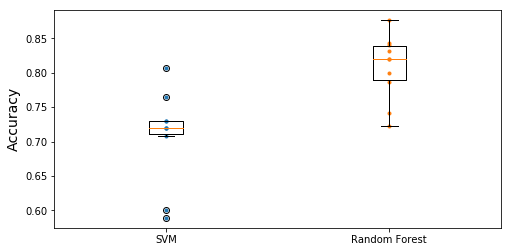

In [168]:
plt.figure(figsize=(8,4))
plt.plot([1] * 10, svm_scores, ".")
plt.plot([2] * 10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=["SVM", "Random Forest"])
plt.ylabel("Accuracy", fontsize=14)

In [169]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket","Survived"]].groupby(["AgeBucket"]).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [170]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(["RelativesOnboard"]).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [1]:
import os

In [2]:
SPAM_PATH = r"E:\jupyter-workspace\datas\20030228_spam"

In [3]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")

ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [4]:
len(ham_filenames)

2500

In [5]:
len(spam_filenames)

500

In [9]:
import email
import email.policy
import email.parser

In [10]:
type(email.parser)

module

In [11]:
def load_email(is_spam, filename, spam_path = SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [12]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [13]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [14]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


In [15]:
from collections import Counter

In [16]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([get_email_structure(sub_email) for sub_email in payload]))
    else:
        return email.get_content_type()

In [17]:
def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [18]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [19]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

In [20]:
for header, value in spam_emails[0].items():
    print(header, ":", value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [21]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

In [23]:
X = np.array(ham_emails + spam_emails)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
import re
from html import unescape

In [26]:
def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [27]:
html_spam_emails = [email for email in X_train[y_train == 1] if get_email_structure(email) =="text/html" ]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip())

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [28]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [29]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except:
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [30]:
print(email_to_text(sample_html_spam)[:100], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


In [31]:
import nltk

In [32]:
try:
    stemmer = nltk.PorterStemmer()
    for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
        print(word, "=>", stemmer.stem(word))
except ImportError:
    print("Error: stemming requires the NLTK module.")
    stemmer = None

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [36]:
import urlextract
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

In [39]:
url_extract = urlextract.URLExtract()

In [60]:
class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_header=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_number=True, stemming=True):
        self.strip_header = strip_header
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_number
        self.stemming = stemming

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transform = []
        for email in X:
            text = email_to_text(email)
            if text is None:
                text = ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and urlextract is not None:
                urls = list(set(url_extract.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', "NUMBER", text)
            if self.remove_punctuation:
                text = re.sub(r"\W+", ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transform.append(word_counts)
        return X_transform

In [61]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

[Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
 Counter({'some': 1,
          'interest': 1,
          'quot': 1,
          'url': 1,
          'thoma': 1,
          'jefferson': 2,
          'i': 2,
          'have': 2,
          'examin': 1,
          'all': 3,
          'the': 11,
          'known': 1,
          'superstit': 2,
          'of': 9,
          'word': 1,
          'and': 8,
          'do': 1,
          'not': 1,
          'find': 1,
          'in': 1,
          'our': 1,
          'particular': 1,
          'christian': 3,
          'one': 2,
          'redeem': 1,
          'featur': 1,
          'they': 1,
          'are': 1,
          'alik': 1,
          'found': 1,
          'on': 2,
          'fabl': 1,
          'mytholog': 1,
          'million': 1,
          'innoc': 1,
          'men': 1,
          'women': 1,
          'children': 1,
          'sinc': 1,
          'introduct': 1,
          'been': 2,
          'burnt': 1,
    

In [42]:
from scipy.sparse import csr_matrix

In [43]:
class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size

    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.most_common = most_common
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self

    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [44]:
vocab_transformer = WordCounterToVectorTransformer(10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int32'>'
	with 20 stored elements in Compressed Sparse Row format>

In [45]:
X_few_vectors.toarray()

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [99, 11,  9,  8,  1,  3,  3,  1,  3,  2,  3],
       [65,  0,  1,  2,  5,  3,  1,  2,  0,  1,  0]], dtype=int32)

In [46]:
vocab_transformer.vocabulary_

{'the': 1,
 'of': 2,
 'and': 3,
 'url': 4,
 'to': 5,
 'all': 6,
 'in': 7,
 'christian': 8,
 'on': 9,
 'by': 10}

In [51]:
row = [0,0,0,1,1,1,2,2,2]
col = [0,0,1,1,2,3,1,2,3]
data = [1,2,3,1,1,1,2,2,2]
csr_matrix((data,(row,col)), shape=(3,4)).toarray()

array([[3, 3, 0, 0],
       [0, 1, 1, 1],
       [0, 2, 2, 2]], dtype=int32)

In [52]:
from sklearn.pipeline import Pipeline

In [62]:
preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer())
])
X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [63]:
print(X_train_transformed.shape)
print(y_train.shape)

(2400, 1001)
(2400,)


In [64]:
log_clf = LogisticRegression(random_state=42)
score = cross_val_score(log_clf,X_train_transformed, y_train,cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] .................................. , score=0.98375, total=   1.8s
[CV]  ................................................................
[CV] .................................... , score=0.985, total=   0.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ................................... , score=0.9925, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s finished


0.9870833333333334

In [65]:
from sklearn.metrics import precision_score, recall_score

In [66]:
X_test_transformed = preprocess_pipeline.transform(X_test)
log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train_transformed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
y_pred = log_clf.predict(X_test_transformed)

In [68]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))

Precision: 94.90%


In [69]:
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Recall: 97.89%
